In [1]:
import warnings
warnings.filterwarnings('ignore', 'binning')
warnings.filterwarnings('ignore', 'JERSF')
warnings.filterwarnings('ignore','Port')
warnings.filterwarnings('ignore', "The 'nopython'")
warnings.filterwarnings('ignore', "Pandas")
warnings.filterwarnings('ignore', "Schedd")
warnings.filterwarnings('ignore')

In [2]:
from boostedhiggs.hbbprocessor_test import HbbProcessor
from boostedhiggs import corrections
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import distributed
import dask
# from distributed import Client
# from lpcjobqueue import LPCCondorCluster

In [3]:
cluster = LPCCondorCluster(
   #ship_env=True,
   log_directory='/uscmst1b_scratch/lpc1/3DayLifetime/cjmoore/mylog',
   #memory='4718592000'
)

In [4]:
cluster.adapt(minimum=5, maximum=10)

In [5]:
client = Client(cluster)

In [6]:
# events = NanoEventsFactory.from_root(
#     [{fn: "/Events"} for fn in filelist['Hbb']],
#     permit_dask=True,
# ).events()

In [7]:
# from boostedhiggs.hbbprocessor_test import HbbProcessor
# from boostedhiggs import corrections
# from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
# import json

In [3]:
with open("jsons/qcd_and_more_hj_files.json") as fin:
    filelist = json.load(fin)

In [4]:
events = NanoEventsFactory.from_root(
    {filelist['Hbb'][0]:"Events"},
    permit_dask=True,
    metadata={"dataset": "Hbb"},
).events()

In [5]:
result = HbbProcessor().process(events)

HMM


In [6]:
result

{'Hbb': {'cutflow_msd': Hist(
    StrCategory([], growth=True, name='region'),
    IntCategory([0, 1, 2, 3], name='genflavor'),
    IntCategory([0, 1, 2, 3], growth=True, name='cut', label='Cut index'),
    Regular(23, 40, 201, name='msd', label='Jet $m_{sd}$'),
    storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills),
  'cutflow_eta': Hist(
    StrCategory([], growth=True, name='region'),
    IntCategory([0, 1, 2, 3], name='genflavor'),
    IntCategory([0, 1, 2, 3], growth=True, name='cut', label='Cut index'),
    Regular(40, -2.5, 2.5, name='eta', label='Jet $\\eta$'),
    storage=Weight()) # Sum: WeightedSum(value=0, variance=0) (has staged fills),
  'cutflow_pt': Hist(
    StrCategory([], growth=True, name='region'),
    IntCategory([0, 1, 2, 3], name='genflavor'),
    IntCategory([0, 1, 2, 3], growth=True, name='cut', label='Cut index'),
    Regular(100, 400, 1200, name='pt', label='Jet $p_{T}$ [GeV]'),
    storage=Weight()) # Sum: WeightedSum(value=0, vari

In [7]:
#Things I've had to do:
    #Add dask.delayed to corrections within new softdrop class __init__
    #upgrade scipy
    #upgrade distributed
    #move the contents of build_jec to hbbprocessor (temporary)
    #add dask_future fix to corrections.py
    #needed to comment out missing fields

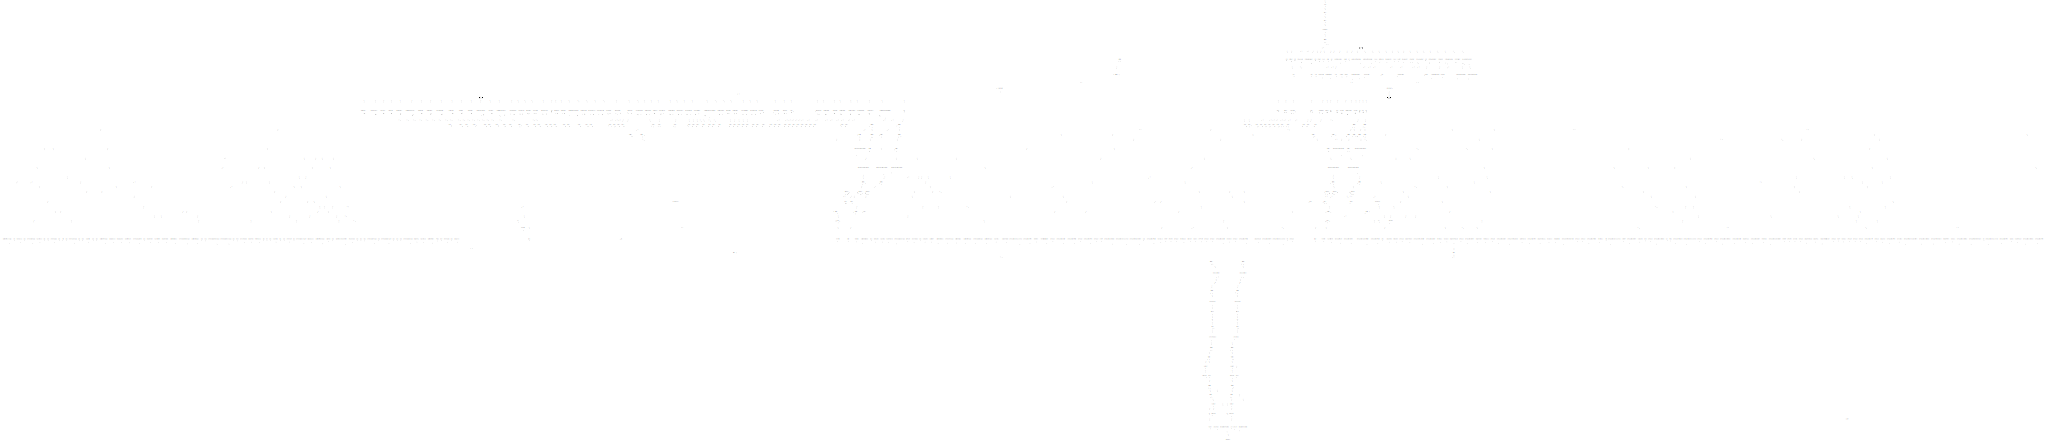

In [13]:
dask.visualize(result['Hbb']['sumw'], filename='graph.svg')